In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
from scipy.ndimage import gaussian_filter
%matplotlib inline

In [3]:
def get_rewards(exp_name = "", sigma=100):
    filehandler = open("../solution_data/"+str(exp_name)+"/exp_dict.pkl", 'rb')
    exp_dict = pickle.load(filehandler)
    return gaussian_filter(np.array( exp_dict['rewards'])*150+20, sigma)
    
def plot_group_rewards(exp_names = [], sigma=100):
    group_rewards = []
    for exp_name in exp_names:
        group_rewards.append(get_rewards(exp_name, sigma=sigma))
    
    min_length = min([len(gr) for gr in group_rewards])
    trimmed_group_rewards = []
    for group_reward in group_rewards:
        trimmed_group_rewards.append(np.expand_dims(group_reward[:min_length], axis=0))
    
    trimmed_group_rewards = np.concatenate(trimmed_group_rewards, axis=0)
    trimmed_mean = np.mean(trimmed_group_rewards, axis=0)
    trimmed_std = np.std(trimmed_group_rewards, axis=0)
    
    plt.fill_between(np.arange(min_length), trimmed_mean-trimmed_std, trimmed_mean+trimmed_std, alpha = 0.3)
    plt.plot(trimmed_mean)
    

## First, testing to make sure RL is working and looking at different hyperparams in this environment

Text(0.5, 1.0, 'Maximize x/y position with standard reparameterization')

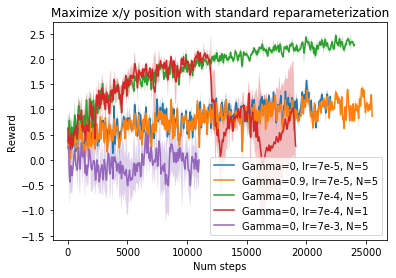

In [1590]:

# rewards = plot_group_rewards(["test1", "test2", "test3", "test4"])
rewards = plot_group_rewards(["param2_test1", "param2_test2", "param2_test3", "param2_test4"])
rewards = plot_group_rewards(["param2_test1_gamma=0.9", "param2_test2_gamma=0.9", "param2_test3_gamma=0.9", "param2_test4_gamma=0.9"])
rewards = plot_group_rewards(["param2_test1_lr=7e-4", "param2_test2_lr=7e-4", "param2_test3_lr=7e-4", "param2_test4_lr=7e-4"])
rewards = plot_group_rewards(["param2_test1_n=1", "param2_test2_n=1", "param2_test3_n=1", "param2_test4_n=1"])
rewards = plot_group_rewards(["param2_test1_lr=7e-3", "param2_test2_lr=7e-3", "param2_test3_lr=7e-3", "param2_test4_lr=7e-3"])
plt.xlabel("Num steps")
plt.ylabel("Reward")
plt.legend(["Gamma=0, lr=7e-5, N=5", "Gamma=0.9, lr=7e-5, N=5", "Gamma=0, lr=7e-4, N=5", "Gamma=0, lr=7e-4, N=1", "Gamma=0, lr=7e-3, N=5"])
plt.title("Maximize x/y position with standard reparameterization")



## Simple RL Testing w/ a Single-Step Task: Two-Stack

Text(0.5, 1.0, 'Maximize x/y position with standard reparameterization')

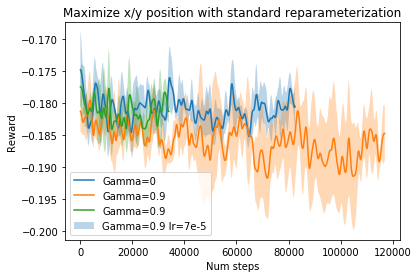

In [1362]:
rewards = plot_group_rewards(["twostack_test1", "twostack_test2", "twostack_test3", "twostack_test4"])
rewards = plot_group_rewards(["twostack_test1_gamma=0.9", "twostack_test2_gamma=0.9", "twostack_test3_gamma=0.9", "twostack_test4_gamma=0.9"])
rewards = plot_group_rewards(["twostack_test1_lr=7e-5", "twostack_test2_lr=7e-5", "twostack_test3_lr=7e-5", "twostack_test4_lr=7e-5"])

plt.xlabel("Num steps")
plt.ylabel("Reward")
plt.legend(["Gamma=0", "Gamma=0.9", "Gamma=0.9", "Gamma=0.9 lr=7e-5"])
plt.title("Maximize x/y position with standard reparameterization")


### Testing other combinations to find one that learns
#### Conclusions: Even two-stack is too sparse and will require some sort of experience replay balancing

Text(0.5, 1.0, 'Maximize x/y position with standard reparameterization')

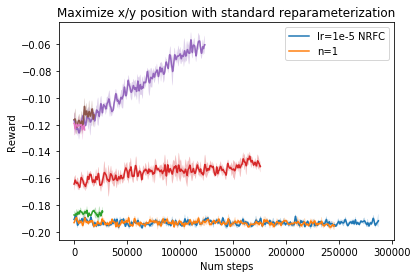

In [1357]:

rewards = plot_group_rewards(["twostack_test1_nogamma", "twostack_test2_nogamma", "twostack_test3_nogamma", "twostack_test4_nogamma"])
rewards = plot_group_rewards(["twostack_test1_reparam", "twostack_test2_reparam", "twostack_test3_reparam", "twostack_test4_reparam"])
#Div3
rewards = plot_group_rewards(["twostack_test1_nonreparam", "twostack_test2_nonreparam", "twostack_test3_nonreparam", "twostack_test4_nonreparam"])
#Div5
rewards = plot_group_rewards(["twostack_test1_div5", "twostack_test2_div5", "twostack_test3_div5", "twostack_test4_div5"])
#Div8
rewards = plot_group_rewards(["twostack_test1_div8", "twostack_test2_div8", "twostack_test3_div8", "twostack_test4_div8"])
rewards = plot_group_rewards(["twostack_test1_div8_highlr", "twostack_test2_div8_highlr", "twostack_test3_div8_highlr", "twostack_test4_div8_highlr"])
rewards = plot_group_rewards(["twostack_test1_div8_nogamma", "twostack_test2_div8_nogamma", "twostack_test3_div8_nogamma", "twostack_test4_div8_nogamma"])

plt.xlabel("Num steps")
plt.ylabel("Reward")
plt.legend(["lr=1e-5 NRFC", "n=1"])
plt.title("Maximize x/y position with standard reparameterization")

### Testing out Balanced vs Unbalanced Experience Replay

Text(0.5, 1.0, 'Performance on 2-Stack under different splits')

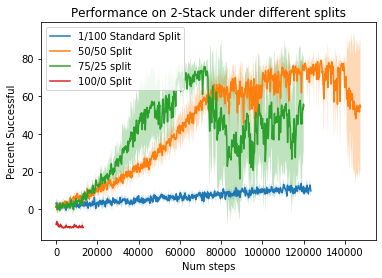

In [11]:
rewards = plot_group_rewards(["twostack_test1_div8", "twostack_test2_div8", "twostack_test3_div8", "twostack_test4_div8"])
rewards = plot_group_rewards(["twostack_test1_div8_highlr", "twostack_test2_div8_highlr", "twostack_test3_div8_highlr", "twostack_test4_div8_highlr"])
rewards = plot_group_rewards(["twostack_test1_div8_n=2", "twostack_test2_div8_n=2", "twostack_test3_div8_n=2", "twostack_test4_div8_n=2"])
rewards = plot_group_rewards(["twostack_test1_div8_lr=5e-3", "twostack_test2_div8_lr=5e-3", "twostack_test3_div8_lr=5e-3", "twostack_test4_div8_lr=5e-3"])

plt.xlabel("Num steps")
plt.ylabel("Percent Successful")
plt.legend(["1/100 Standard Split", "50/50 Split", "75/25 split", "100/0 Split"])
plt.title("Performance on 2-Stack under different splits")

Text(0.5, 1.0, 'Two-Stack Reinforcement Learning')

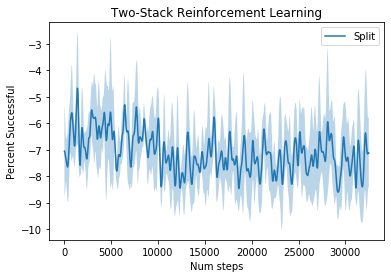

In [57]:
rewards = plot_group_rewards(["split_debug_div4","split_debug_div4_s2","split_debug_div4_s3","split_debug_div4_s4"])

plt.xlabel("Num steps")
plt.ylabel("Percent Successful")
plt.legend(["Split"])
plt.title("Two-Stack Reinforcement Learning")